<a href="https://colab.research.google.com/github/MandilJThapa/Pricipal_component_Analysis/blob/master/gender_classification_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [73]:
!kaggle datasets download -d cashutosh/gender-classification-dataset

gender-classification-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [74]:
import zipfile
zipref= zipfile.ZipFile('/content/gender-classification-dataset.zip')
zipref.extractall('/content')
zipref.close()

In [75]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization, Conv2D, MaxPooling2D, Dropout
from keras import Sequential
from keras.preprocessing.image import ImageDataGenerator

In [76]:
train_datagen=  ImageDataGenerator(
     rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)
test_datagen= ImageDataGenerator( rescale=1./255,)

train_ds = train_datagen.flow_from_directory(
    directory='/content/Training',
    # labels='inferred',
    class_mode='binary',
    batch_size=48,
    target_size=(250, 250)
)

validation_ds =  test_datagen.flow_from_directory(
    directory='/content/Validation',
    # labels='inferred',
    class_mode='binary',
    batch_size=48,
    target_size=(250, 250)
)


Found 47009 images belonging to 2 classes.
Found 11649 images belonging to 2 classes.


In [77]:
# from keras.applications.vgg16 import VGG16
# conv = VGG16(
#     weights='imagenet',
#     include_top= False,

#     input_shape=(150,150,3))

In [78]:

from keras.preprocessing import image
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
import numpy as np


In [79]:
from keras import regularizers
model= Sequential()

model.add(Conv2D(32, kernel_size= (3,3), activation= 'relu',input_shape=(250,250,3),kernel_regularizer=regularizers.l2(0.001),padding="VALID"))
model.add(MaxPooling2D(pool_size=(2,2)))



model.add(Conv2D(64, kernel_size= (3,3), activation= 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))



model.add(Conv2D(64, kernel_size= (3,3), activation= 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))



model.add(Conv2D(128, kernel_size= (3,3), activation= 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))



model.add(Conv2D(128, kernel_size= (3,3), activation= 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))



model.add(Flatten())
model.add(Dense(256, activation='relu'))


model.add(Dense(1, activation='sigmoid'))




In [80]:
# conv.trainable= False

In [81]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [82]:
history = model.fit(train_ds, epochs=10, validation_data=validation_ds, steps_per_epoch=70, validation_steps=50)


Epoch 1/10
70/70 [==============================] - 63s 862ms/step - loss: 0.6804 - accuracy: 0.5750 - val_loss: 0.5956 - val_accuracy: 0.6958
Epoch 2/10
70/70 [==============================] - 60s 857ms/step - loss: 0.5020 - accuracy: 0.7678 - val_loss: 0.4272 - val_accuracy: 0.8204
Epoch 3/10
70/70 [==============================] - 59s 839ms/step - loss: 0.4090 - accuracy: 0.8327 - val_loss: 0.3215 - val_accuracy: 0.8858
Epoch 4/10
70/70 [==============================] - 63s 897ms/step - loss: 0.3334 - accuracy: 0.8595 - val_loss: 0.2601 - val_accuracy: 0.9067
Epoch 5/10
70/70 [==============================] - 62s 891ms/step - loss: 0.3024 - accuracy: 0.8902 - val_loss: 0.2035 - val_accuracy: 0.9275
Epoch 6/10
70/70 [==============================] - 63s 895ms/step - loss: 0.2362 - accuracy: 0.9086 - val_loss: 0.2073 - val_accuracy: 0.9221
Epoch 7/10
70/70 [==============================] - 60s 854ms/step - loss: 0.2378 - accuracy: 0.9116 - val_loss: 0.2344 - val_accuracy: 0.9129

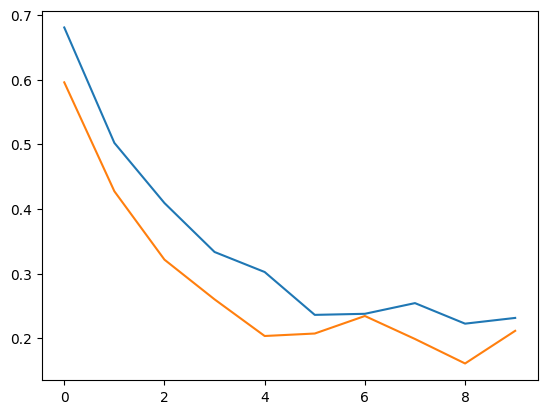

In [90]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

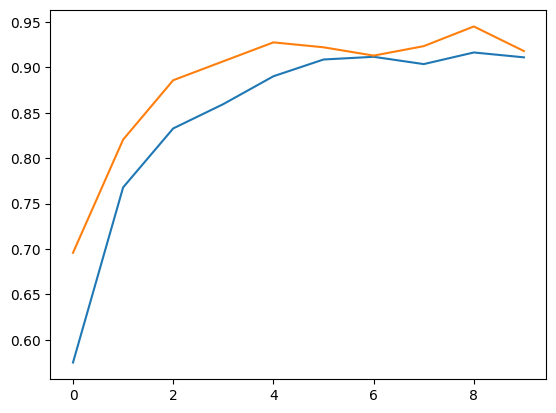

In [91]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [112]:
import cv2

# Load the test image
test_img_path = '/content/men2.jpg'  # Corrected file path
test_img = cv2.imread(test_img_path)
test_img = cv2.resize(test_img, (250, 250))
test_input = test_img.reshape((1, 250, 250, 3))

# Make the prediction
predictions = model.predict(test_input)

threshold = 0.5

# Convert probabilities to binary predictions
predicted_gender = (predictions > threshold).astype(int)

# Print or use the predicted gender
print("Predicted Gender:", "Female" if predicted_gender[0] else "Male")


1/1 [==============================] - 0s 20ms/step
Predicted Gender: Female
